In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import plotly.express as px
import statsmodels.formula.api as smf

df = pd.read_csv('Housing_group.csv')

df.head()   

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.42,33.35,14,25135,4819.0,35682,4769,25729,134400,<1H OCEAN
1,-121.79,36.64,11,32627,6445.0,28566,6082,23087,118800,<1H OCEAN
2,-121.44,38.43,3,39320,6210.0,16305,5358,49516,153700,INLAND
3,-117.74,33.89,4,37937,5471.0,16122,5189,74947,366300,<1H OCEAN
4,-117.78,34.03,8,32054,5290.0,15507,5050,60191,253900,<1H OCEAN


In [134]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,38706.710029,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,18998.217179,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,4999.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,25634.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,35348.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,47432.500000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,150001.000000,500001.000000


<h2>Locating and counting missing values</h2>
The column total_bedrooms seem to have 207 missing values, relative to the total of 20640 observed values.

In [135]:
# David

for column in df:
    if df[column].isnull().values.any():
        print('Column', column, 'has missing values')

missing_values = df['total_bedrooms'].isna().sum().sum()
total_values = len(df.index)

print('total_bedrooms has', missing_values, 'missing values. This is relative to the total of', total_values , 'values')

Column total_bedrooms has missing values
total_bedrooms has 207 missing values. This is relative to the total of 20640 values


<h2>Plot Matrix</h2>
A few variables seem to have capped values, such as median_house_value and median_house_age. There seem to be a few correlations, such as median income and median housevalue, house value and amount of rooms and amount of rooms and income.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

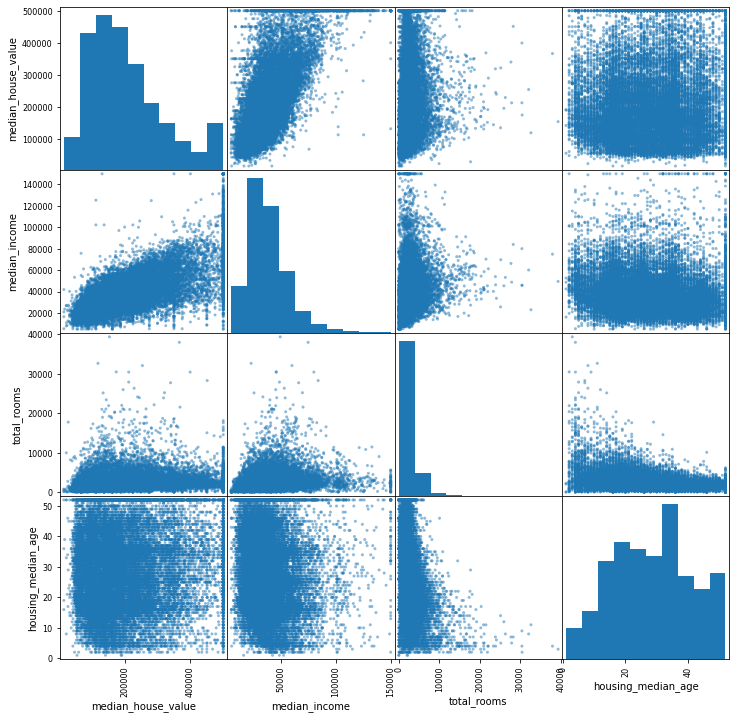

In [136]:
# David

from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(df[attributes], figsize=(12,12))

In [137]:
# David
# Check for normality of distributions

alpha = 0.05
df = df.dropna()

for stat in df:
    try:
        shapiro_stats = stats.shapiro(df[stat])
        p_val = shapiro_stats.pvalue
        if p_val < alpha:
            print(stat, 'is statistically normally distributed')
    except:
        pass


longitude is statistically normally distributed
latitude is statistically normally distributed
housing_median_age is statistically normally distributed
total_rooms is statistically normally distributed
total_bedrooms is statistically normally distributed
population is statistically normally distributed
households is statistically normally distributed
median_income is statistically normally distributed
median_house_value is statistically normally distributed


/Users/davidwidlak/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

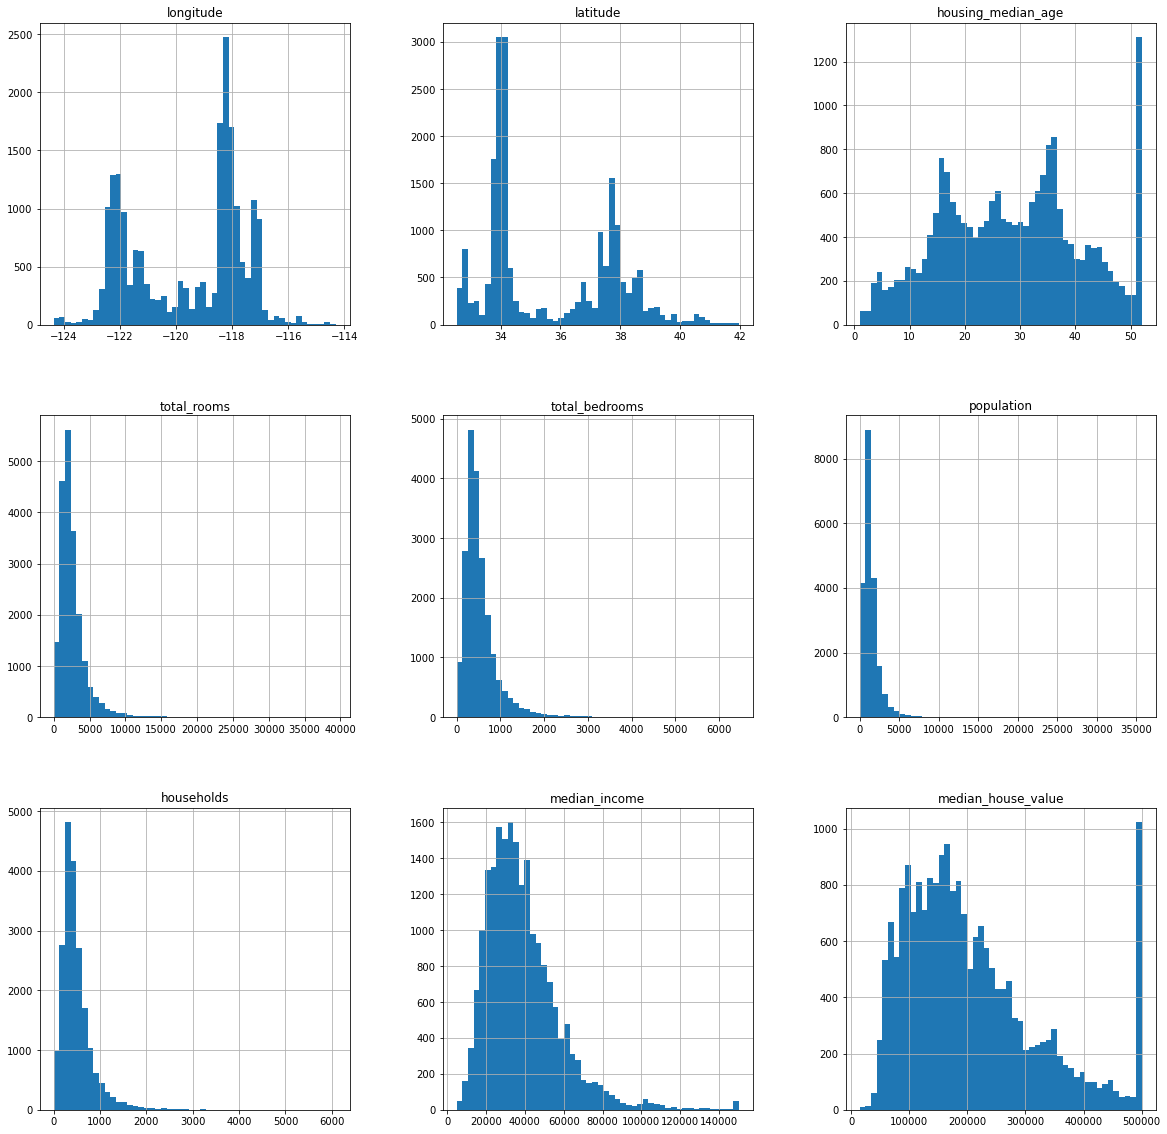

In [138]:
#Lawrence
df.hist(bins=50, figsize=(20, 20))

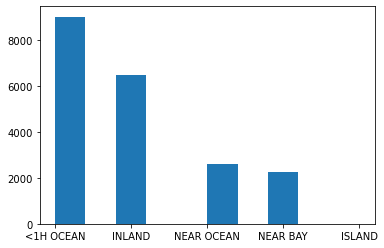

In [139]:
#Sevilio
plt.hist(df['ocean_proximity'], bins=10)
plt.show()

In [140]:
#Lawrence
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<h2>Where is the data demographically located?</h2>
The data is demographically located in Los Angeles, USA. When zooming into the interactive map below, the data is mostly concentrated around the coast areas.

In [141]:
# David

fig = px.density_mapbox(df, lat='latitude', lon='longitude', radius=5, 
                        center=dict(lat=37.5, lon=-118), zoom=4,
                        mapbox_style="open-street-map")
fig.show()